# MANGOPY
This tutorial will go over the basic functions of the mangopy package.

There are two main classes in the mangopy package:
* Mango - for getting and plotting data for individual imagers
* Mosaic - for creating and plotting combined mosaics of all the imagers

## Mango
First, import the Mango class.

In [1]:
from mangopy import Mango
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Now, instantiate a Mango object.  There are no required inputs, but you can optionally specify the directory your MANGO data is stored in using the `datadir` keyword.  By default, mangopy assumes data is stored in a temporary `MANGOData` directory, the location of which is determined by the `tempfile` library.

In [2]:
man = Mango()

No data directory has been specified!  If data is downloaded, it will be saved to /var/folders/yf/c17s54f12c1bg0cxdywsxyxjssh4z4/T/MANGOData.  This is also where mangopy will look for existing data files.


Specify what site you would like to look at.

In [3]:
site = man.get_site_info('Capitol Reef Field Station')

Now set a datetime object and view the image from that time.

Attempting to download CApr1016.h5 from FTP server.
Sucessfully downloaded CApr1016.h5


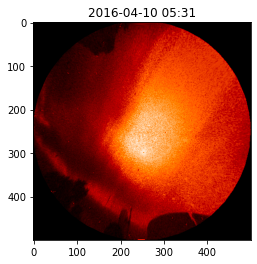

In [4]:
import datetime as dt
time0 = dt.datetime(2016,4,10,5,30)
man.plot(site,time0)

You can also show the site on a map.

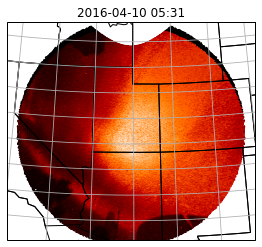

In [5]:
man.map(site,time0)

## Mosaic
Now, import the Mosaic class.

In [6]:
from mangopy import Mosaic

Now instantiate the Mosaic class.  By default, Mosaic will try to use all cameras in the MANGO network, but you can specify a list of only certain sites using the `sites` keyword.  Mosaic inherits the Mango class, so it will similarly define a default data directory if none is specified.

In [7]:
mos = Mosaic()

No data directory has been specified!  If data is downloaded, it will be saved to /var/folders/yf/c17s54f12c1bg0cxdywsxyxjssh4z4/T/MANGOData.  This is also where mangopy will look for existing data files.


Now plot a mosaic image of the entire network for the same time specified above.

Attempting to download HApr1016.h5 from FTP server.
Sucessfully downloaded HApr1016.h5


/Users/e30737/Desktop/Projects/MANGO/mangopy/mangopy/mosaic.py:130: RuntimeWarning: invalid value encountered in greater_equal
  flags = np.all(np.array([lon_arr>=limits[0][:,None],lon_arr<=limits[1][:,None]]),axis=0)
/Users/e30737/Desktop/Projects/MANGO/mangopy/mangopy/mosaic.py:130: RuntimeWarning: invalid value encountered in less_equal
  flags = np.all(np.array([lon_arr>=limits[0][:,None],lon_arr<=limits[1][:,None]]),axis=0)


Attempting to download BApr1016.h5 from FTP server.
Sucessfully downloaded BApr1016.h5
Attempting to download IApr1016.h5 from FTP server.
Sucessfully downloaded IApr1016.h5
Attempting to download LApr1016.h5 from FTP server.
Exception: No data available for Millstone Hill Observatory on 2016-04-10.
Attempting to download PApr1016.h5 from FTP server.
Exception: No data available for Pisgah Astronomical Observatory on 2016-04-10.
Attempting to download RApr1016.h5 from FTP server.
Exception: No data available for Rainwater Observatory on 2016-04-10.
Attempting to download MApr1016.h5 from FTP server.
Exception: No data available for Madison on 2016-04-10.
Attempting to download DApr1016.h5 from FTP server.
Exception: No data available for McDonald Observatory on 2016-04-10.


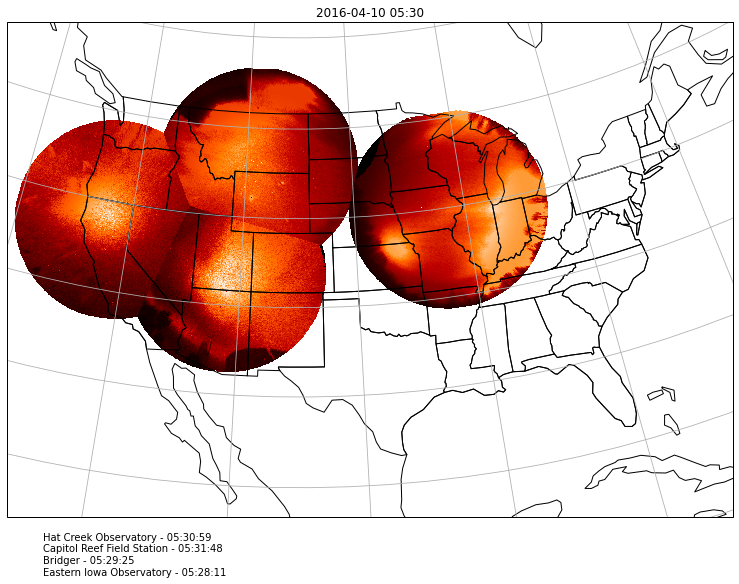

In [8]:
mos.plot_mosaic(time0)

## Accessing Data Directly
You can also use the Mango and Mosaic classes to return data as arrays if you'd like to do your own data analysis/visualization.

The `get_data` method of `Mango` accepts a site and desired time and returns the image values as a 2D array, the geodetic latitude of each pixel, the geodetic longitude of each pixel, and the true time the image was captured.  Geodetic latitude and longitude assume the image is projected to 250 km.

In [9]:
site = man.get_site_info('Capitol Reef Field Station')
img, lat, lon, truetime = man.get_data(site,time0)
print(img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The `create_mosaic` method of `Mosaic` creates an array of the combined FoVs of all available cameras in the MANGO network at the time requested.

In [10]:
img, lat, lon = mos.create_mosaic(time0)
print(img)

Attempting to download LApr1016.h5 from FTP server.
Exception: No data available for Millstone Hill Observatory on 2016-04-10.
Attempting to download PApr1016.h5 from FTP server.
Exception: No data available for Pisgah Astronomical Observatory on 2016-04-10.
Attempting to download RApr1016.h5 from FTP server.
Exception: No data available for Rainwater Observatory on 2016-04-10.
Attempting to download MApr1016.h5 from FTP server.
Exception: No data available for Madison on 2016-04-10.
Attempting to download DApr1016.h5 from FTP server.
Exception: No data available for McDonald Observatory on 2016-04-10.
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
